## Exercise for Chapter 4

According to the research result **Socioeconomic development and life expectancy relationship: evidence from the EU accession candidate countries** by Goran Miladinov in Journal of Population Sciences, Genus volume 76, Article number: 2 (2020), the results show that 

* a country's population health and socioeconomic development have a significant impact on life expectancy at birth; 

* in other words, as a country's population health and socioeconomic development improves, infant mortality rates decrease, and life expectancy at birth appears to rise. 

* Through increased economic growth and development in a country, **GDP per capita raises life expectancy at birth, resulting in a longer lifespan**.

https://genus.springeropen.com/articles/10.1186/s41118-019-0071-0#:~:text=GDP%20per%20capita%20increases%20the,to%20the%20prolongation%20of%20longevity.)

In this section, we use data to attempt to gain insight on the relationship between life expectancy and gdp per capita of world countries.

Note that we will download a dataset from **Kaggle**. 

Kaggle, a Google LLC subsidiary, is an online community of data scientists and machine learning experts. Users can use Kaggle to search and publish data sets, study and construct models in a web-based data-science environment, collaborate with other data scientists and machine learning experts, and compete in data science competitions.

1. Import the Gapminder World dataset from the following link:

https://www.kaggle.com/tklimonova/gapminder-datacamp-2007?select=gapminder_full.csv

(for more detail on how to read CSV file from kaggle https://www.analyticsvidhya.com/blog/2021/04/how-to-download-kaggle-datasets-using-jupyter-notebook/)

In [ ]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [5]:
# od.download("https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset")

od.download('https://www.kaggle.com/tklimonova/gapminder-datacamp-2007')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  pairotesat


Your Kaggle Key:

  ································


100%|██████████| 35.5k/35.5k [00:00<00:00, 995kB/s]

In [2]:
import pandas as pd

In [6]:
#gapminder = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/gapminder_full.csv')

url = 'https://raw.githubusercontent.com/STLinde/Anvendt-Statistik/main/gapminder_full.csv'
gapminder = pd.read_csv(url)

In [8]:
gapminder.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


We will begin by looking at some of its features to get get an idea of its content.

2. How many qualitative variables are there in this Gapminder dataset?
(See for more detail:

https://www.abs.gov.au/websitedbs/D3310114.nsf/Home/Statistical+Language+-+quantitative+and+qualitative+data#:~:text=What%20are%20quantitative%20and%20qualitative,much%3B%20or%20how%20often).&text=Qualitative%20data%20are%20data%20about%20categorical%20variables%20(e.g.%20what%20type).

**Note:** It is crucial to figure out whether the data is quantitative or qualitative, as this has an impact on the statistics that can be obtained.

3. Write Python code to create a table that gives the number of countries in each continent of **the lastest year** in this dataset.

In [64]:
# Here we use multiindex 
# See https://towardsdatascience.com/how-to-use-multiindex-in-pandas-to-level-up-your-analysis-aeac7f451fce

latest_year = gapminder['year'].max()

df_grouped_counted = gapminder.groupby(['year','continent']).count()

df_grouped_counted.loc[([latest_year],slice(None))][['country']]

# Assign output3 to store the result
output3 = df_grouped_counted.loc[([latest_year],slice(None))][['country']]

print(output3)

                country
year continent         
2007 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2


4. Write Python code to graphically present the results obtained in the previous question.

<AxesSubplot:xlabel='continent'>

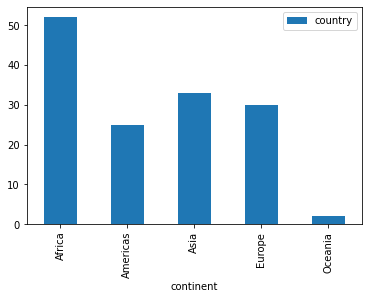

In [48]:
output3.loc[2007,:].plot.bar()

#cf with output3.plot.bar()

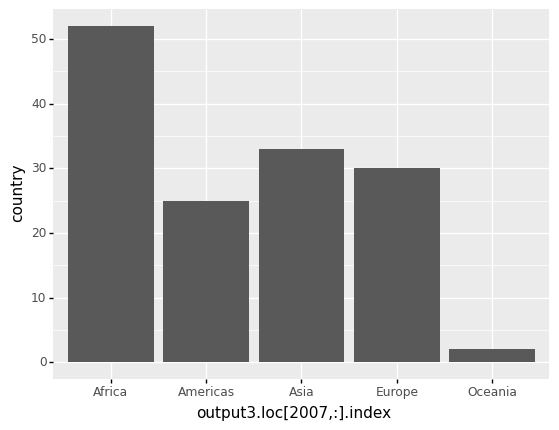

<ggplot: (306029969)>

In [51]:
# With plotnine (ggplot2)

from plotnine import *

(
    ggplot(output3.loc[2007,:])  # What data to use
    + aes(x='output3.loc[2007,:].index',y='country')  # What variable to use
    + geom_col()  # Geometric object to use for drawing
)

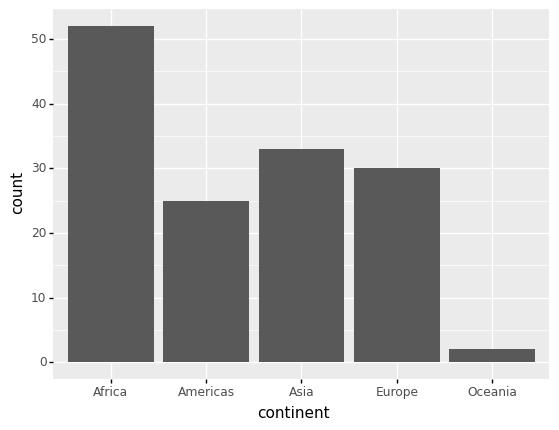

<ggplot: (314062361)>

In [55]:
gapminder[gapminder['year']==latest_year]

(
    ggplot(data = gapminder[gapminder['year']==latest_year]) +
    aes(x = 'continent') +
    geom_bar()
) 

5. **What Is GDP Per Capita?**

The per capita gross domestic product (GDP) is a financial measure that calculates a country's economic output per person by dividing its GDP by its population.

Write Python code to summarize some statistical data like percentile, mean and standard deviation of the GDP per capita of the latest year broken down by continent.

In [71]:
gapminder2007 = gapminder[gapminder['year']==latest_year]

gapminder2007[['country','continent','gdp_cap']].groupby('continent').describe()

# For output validation
# gapminder2007[gapminder2007['continent']=='Asia']['gdp_cap'].mean()

gdp_cap                                                          \
            count          mean           std           min           25%   
continent                                                                   
Africa       52.0   3089.032605   3618.163491    277.551859    862.951537   
Americas     25.0  11003.031625   9713.209302   1201.637154   5728.353514   
Asia         33.0  12473.026870  14154.937343    944.000000   2452.210407   
Europe       30.0  25054.481636  11800.339811   5937.029526  14811.898210   
Oceania       2.0  29810.188275   6540.991104  25185.009110  27497.598692   

                                                    
                    50%           75%          max  
continent                                           
Africa      1452.267078   3993.501583  13206.48452  
Americas    8948.102923  11977.574960  42951.65309  
Asia        4471.061906  22316.192870  47306.98978  
Europe     28054.065790  33817.962533  49357.19017  
Oceania    29810.188275  32122.777858  34435.36744

6. What is the average GDP per capita in Asian countries obtained above?

In [77]:
gapminder2007[gapminder2007['continent']=='Asia']['gdp_cap'].mean()

12473.02687013333

7. Plot the histogram for per capita GDP in each continent.

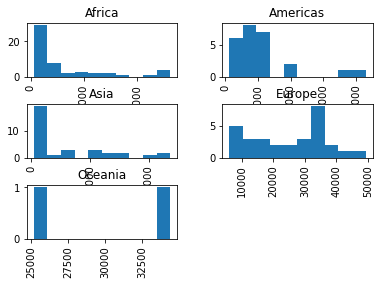

In [89]:
# See https://stackoverflow.com/questions/19584029/plotting-histograms-from-grouped-data-in-a-pandas-dataframe

result = gapminder2007['gdp_cap'].hist(by= gapminder2007['continent'])

Notice the different scale on the x-axis has been used.

<ggplot: (319742313)>

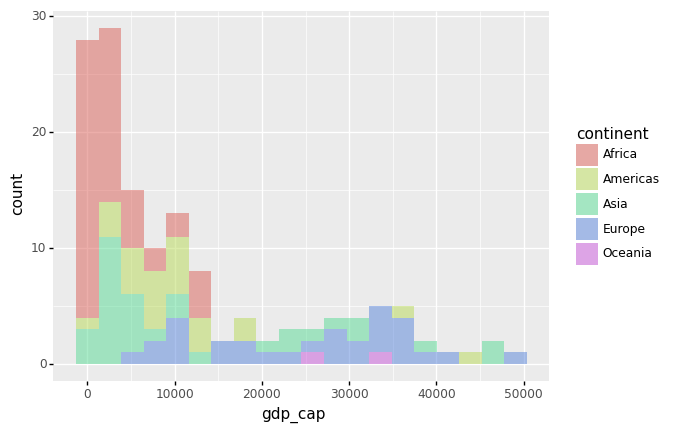

In [122]:
# See
# https://www.r-graph-gallery.com/histogram_several_group.html

(
    ggplot(data = gapminder[gapminder['year']==latest_year]) +
    aes(x='gdp_cap', fill='continent') +
    geom_histogram(bins=20,alpha=0.5)
) 



Notice the different scale on the x-axis has been used.